In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('/Users/divyasandiman/Downloads/census_income.csv')

In [13]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [7]:
df.shape

(32560, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
empty_space = []

for index, row in df.iterrows():
    if '' in row.values:
        empty_space.append(index)

result_df = df.loc[empty_space]
result_df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [30]:
df[df.duplicated()]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
4880,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5103,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9170,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11630,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13083,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15058,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17039,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18554,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18697,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21317,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [31]:
df = df.drop_duplicates()

In [33]:
df.shape

(32536, 15)

In [37]:
df[df['Workclass'].str.strip()=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [38]:
df['Workclass']=df['Workclass'].str.strip()

In [40]:
df['Workclass']=df['Workclass'].str.replace('?','Unknown',regex=False)

In [41]:
df['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', 'Unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [42]:
df['Workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [43]:
education_mapping = {
    'Preschool': 'Less than High School',
    '1st-4th': 'Less than High School',
    '5th-6th': 'Less than High School',
    '7th-8th': 'Less than High School',
    '9th': 'Less than High School',
    '10th': 'Less than High School',
    '11th': 'Less than High School',
    'HS-grad': 'High School',
    '12th': 'High School',
    'Some-college': 'Some College',
    'Assoc-acdm': 'Associate’s Degree',
    'Assoc-voc': 'Associate’s Degree',
    'Bachelors': 'Bachelor’s Degree',
    'Masters': 'Graduate and Professional',
    'Doctorate': 'Graduate and Professional',
    'Prof-school': 'Graduate and Professional'
}

In [48]:
df['Education'] = df['Education'].str.strip().replace(education_mapping)

In [49]:
df['Education'].value_counts()

High School                  10927
Some College                  7282
Bachelor’s Degree             5352
Less than High School         3815
Graduate and Professional     2711
Associate’s Degree            2449
Name: Education, dtype: int64

In [51]:
df=df.drop('Education_num',axis=1)

In [53]:
df.head(2)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelor’s Degree,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,High School,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [56]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [62]:
df['Marital_status']=df['Marital_status'].str.strip().replace(['Married-AF-spouse','Married-spouse-absent','Married-civ-spouse'],'Married')

In [63]:
df['Marital_status'].value_counts()

Married          15411
Never-married    10666
Divorced          4441
Separated         1025
Widowed            993
Name: Marital_status, dtype: int64

In [64]:
df['Occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64

In [66]:
df['Occupation']=df['Occupation'].str.strip()

In [67]:
occupation_grouping = {
    'Prof-specialty': 'White-Collar',
    'Exec-managerial': 'White-Collar',
    'Adm-clerical': 'White-Collar',
    'Sales': 'White-Collar',
    'Tech-support': 'White-Collar',
    'Craft-repair': 'Blue-Collar',
    'Machine-op-inspct': 'Blue-Collar',
    'Transport-moving': 'Blue-Collar',
    'Handlers-cleaners': 'Blue-Collar',
    'Farming-fishing': 'Blue-Collar',
    'Other-service': 'Service',
    'Protective-serv': 'Service',
    'Priv-house-serv': 'Service',
    'Armed-Forces': 'Military',
    '?': 'Unknown'
}

In [68]:
df['Occupation']=df['Occupation'].replace(occupation_grouping)
df['Occupation'].value_counts()

White-Collar    16545
Blue-Collar     10052
Service          4087
Unknown          1843
Military            9
Name: Occupation, dtype: int64

In [69]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [74]:
df['Native_country'].value_counts()

United-States                 29152
Mexico                          639
Unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [72]:
df['Native_country']=df['Native_country'].str.strip().replace('?','Unknown')

In [84]:
country_grouping={
    'United-States': 'North America',
    'Canada': 'North America',
    'Mexico': 'North America',
    'Puerto-Rico': 'North America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Cuba': 'Central/South America',
    'Jamaica': 'Central/South America',
    'Honduras': 'Central/South America',
    'Columbia': 'Central/South America',
    'Ecuador': 'Central/South America',
    'El-Salvador': 'Central/South America',
    'Guatemala': 'Central/South America',
    'Peru': 'Central/South America',
    'Nicaragua': 'Central/South America',
    'Trinadad&Tobago': 'Central/South America',
    'Haiti': 'Central/South America',
    'Dominican-Republic': 'Central/South America',
    'England': 'Europe',
    'Germany': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'France': 'Europe',
    'Greece': 'Europe',
    'Scotland': 'Europe',
    'Yugoslavia': 'Europe',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe',
    'India': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'South': 'Unknown'
}

In [85]:
df['Native_country']=df['Native_country'].str.strip().replace(country_grouping)

In [86]:
df['Native_country'].value_counts()

North America            30040
Asia                       671
Unknown                    662
Central/South America      642
Europe                     521
Name: Native_country, dtype: int64

In [87]:
df['Income'].value_counts()

 <=50K    24697
 >50K      7839
Name: Income, dtype: int64

In [115]:
df['Workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: Workclass, dtype: int64

In [116]:
workclass_mapping = {
    'Private': 'Private',
    'Self-emp-not-inc': 'Self-Employed',
    'Local-gov': 'Government',
    'State-gov': 'Government',
    'Federal-gov': 'Government',
    'Self-emp-inc': 'Self-Employed',
    'Without-pay': 'Without Pay',
    'Never-worked': 'Without Pay',
    'Unknown': 'Unknown'
}

In [117]:
df['Workclass'] = df['Workclass'].replace(workclass_mapping)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Marital_status  32536 non-null  object
 5   Occupation      32536 non-null  object
 6   Relationship    32536 non-null  object
 7   Race            32536 non-null  object
 8   Sex             32536 non-null  object
 9   Capital_gain    32536 non-null  int64 
 10  Capital_loss    32536 non-null  int64 
 11  Hours_per_week  32536 non-null  int64 
 12  Native_country  32536 non-null  object
 13  Income          32536 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.7+ MB


In [123]:
x=df.drop('Income',axis=1)

In [124]:
x.head(2)

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-Employed,83311,Bachelor’s Degree,Married,White-Collar,Husband,White,Male,0,0,13,North America
1,38,Private,215646,High School,Divorced,Blue-Collar,Not-in-family,White,Male,0,0,40,North America


In [125]:
y=df['Income']

In [126]:
y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: Income, Length: 32536, dtype: object

In [180]:
le=LabelEncoder()

KeyError: 'Income'

In [127]:
catcol=[col for col in x.columns if df[col].dtypes=='O']

In [128]:
numcol=[col for col in x.columns if df[col].dtypes!='O']

In [129]:
catcol

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country']

In [130]:
numcol

['Age', 'Fnlwgt', 'Capital_gain', 'Capital_loss', 'Hours_per_week']

In [131]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

In [132]:
for i in catcol:
    
    print(df[i].value_counts())
    print('==============================================')

Private          22673
Government        4350
Self-Employed     3656
Unknown           1836
Without Pay         21
Name: Workclass, dtype: int64
High School                  10927
Some College                  7282
Bachelor’s Degree             5352
Less than High School         3815
Graduate and Professional     2711
Associate’s Degree            2449
Name: Education, dtype: int64
Married          15411
Never-married    10666
Divorced          4441
Separated         1025
Widowed            993
Name: Marital_status, dtype: int64
White-Collar    16545
Blue-Collar     10052
Service          4087
Unknown          1843
Military            9
Name: Occupation, dtype: int64
 Husband           13187
 Not-in-family      8291
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64
 White                 27794
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   

In [133]:
for i in catcol:
    x[i]=x[i].str.strip()

In [134]:
x.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country'],
      dtype='object')

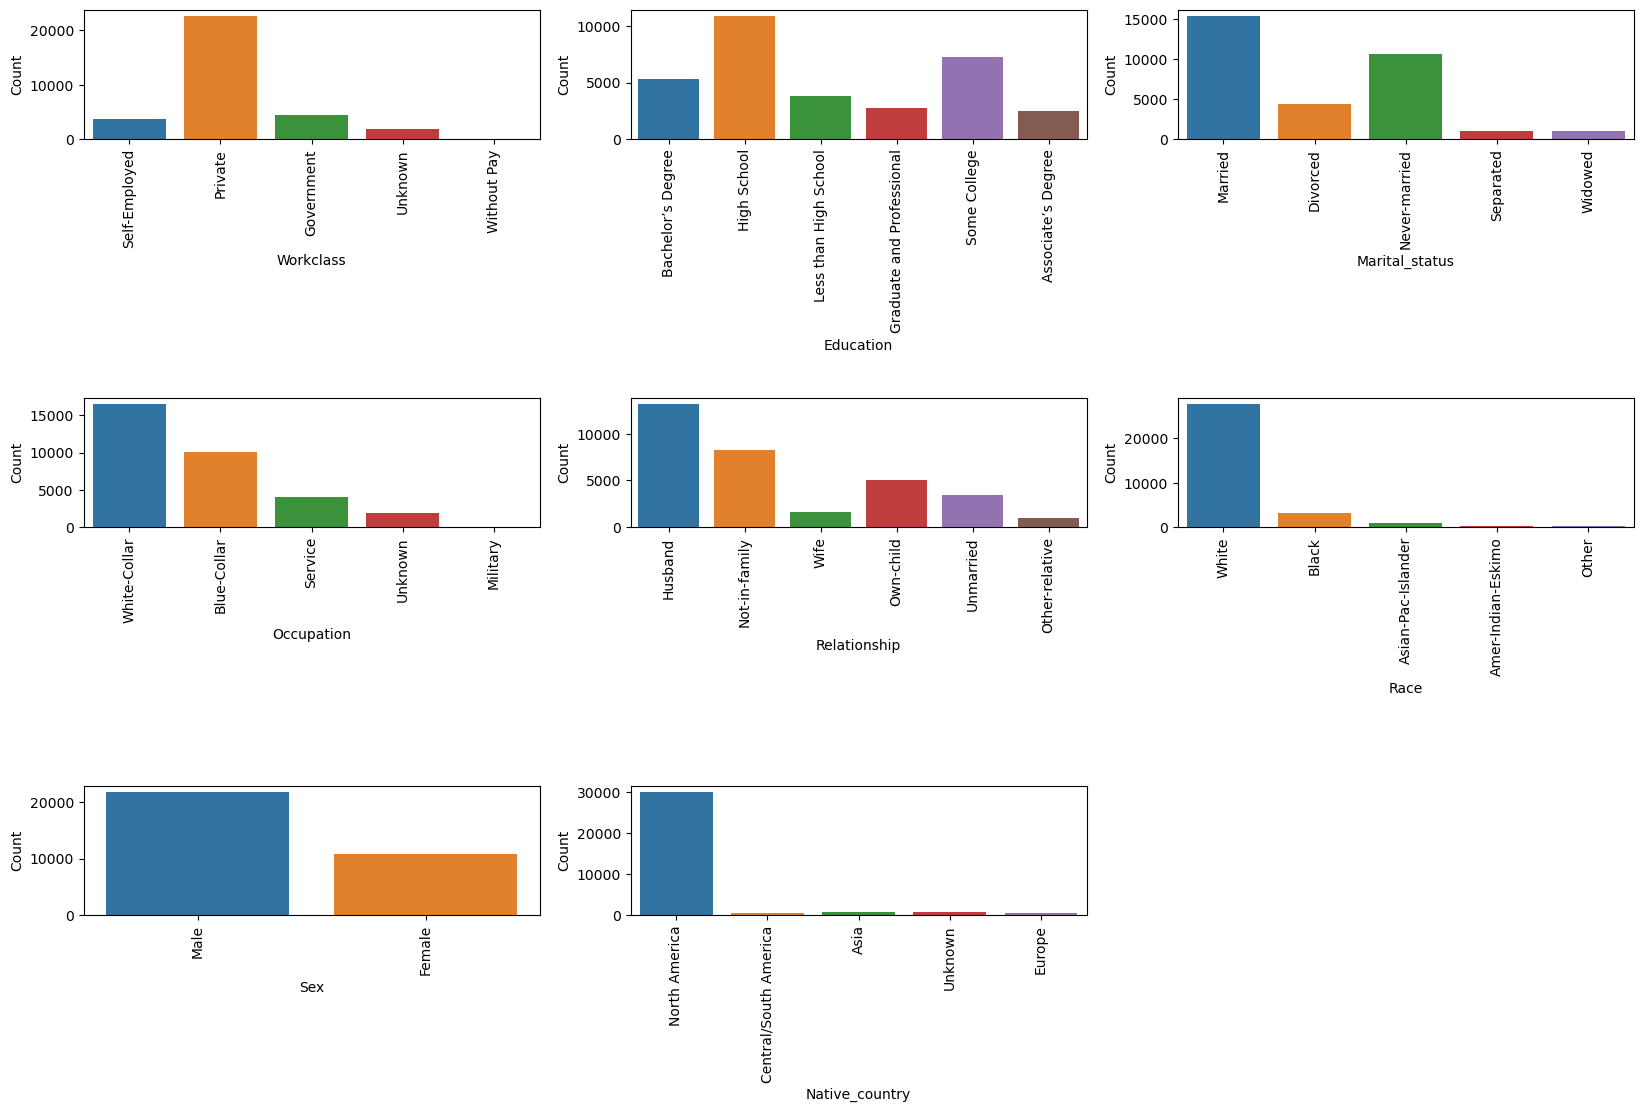

In [135]:
plt.figure(figsize=(20,42))
for num,i in enumerate(catcol):
    plt.subplot(9,3,num+1)
    sns.countplot(x=i,data=x)
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace=2)
plt.show()

In [136]:
ohe_cols=['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Native_country','Sex']

In [137]:
ord_cols=['Education']

In [138]:
education_order=[['Less than High School', 'High School', 'Some College', 'Associate’s Degree', 'Bachelor’s Degree', 'Graduate and Professional']]

In [142]:
onehot_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
ordinal_transformer = OrdinalEncoder(categories=education_order)
numerical_transformer = StandardScaler()

In [146]:
transformer=ColumnTransformer(transformers=[
    ('OneHot',onehot_transformer,ohe_cols),
    ('Ordinal',OrdinalEncoder(),ord_cols),
    ('numerical',numerical_transformer,numcol)
],remainder='passthrough'
        )

In [150]:
pipe=Pipeline(steps=[
    ('preprocessor',transformer),
    ('model',SVC())
])

In [151]:
model_grid=[
    {'model':[LogisticRegression()]},
    {'model':[RandomForestClassifier()]},
    {'model':[SVC()]},
    {'model':[GradientBoostingClassifier()]}
]

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [155]:
gscv=GridSearchCV(pipe,model_grid,cv=5,verbose=2,scoring='accuracy')

In [156]:
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .........................model=LogisticRegression(); total time=   0.4s
[CV] END .........................model=LogisticRegression(); total time=   0.2s
[CV] END .........................model=LogisticRegression(); total time=   0.2s
[CV] END .........................model=LogisticRegression(); total time=   0.2s
[CV] END .........................model=LogisticRegression(); total time=   0.2s
[CV] END .....................model=RandomForestClassifier(); total time=   1.9s
[CV] END .....................model=RandomForestClassifier(); total time=   1.8s
[CV] END .....................model=RandomForestClassifier(); total time=   1.6s
[CV] END .....................model=RandomForestClassifier(); total time=   1.7s
[CV] END .....................model=RandomForestClassifier(); total time=   1.6s
[CV] END ........................................model=SVC(); total time=  10.3s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Workclass',
                                                                          'Marital_status',
                                                                          'Occupation',
                                                                          'Relationship',
                                                                          'Race',
                                                                          'Native_country',
                                                                          'Sex']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Education']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fnlwgt',
                                                                          'Capital_gain',
                                                                          'Capital_loss',
                                                                          'Hours_per_week'])])),
                                       ('model', SVC())]),
             param_grid=[{'model': [LogisticRegression()]},
                         {'model': [RandomForestClassifier()]},
                         {'model': [SVC()]},
                         {'model': [GradientBoostingClassifier()]}],
             scoring='accuracy', verbose=2)

In [157]:
gscv.best_params_

{'model': GradientBoostingClassifier()}

In [158]:
gscv.best_score_

0.8657895620690466

In [160]:
gsmodel=gscv.best_estimator_

In [165]:
param_grid = {
    'model__n_estimators': [100, 200, 300],  
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__min_samples_split': [2, 5, 10]
}

In [166]:
gstuning=GridSearchCV(estimator=gsmodel,param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [167]:
gstuning.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.5s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.6s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.9s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=100; total time=   2.6s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   5.4s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=2, model__n_estimators=200; total time=   5.5s
[CV] END model__learning_rate=0.01, model_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('OneHot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Workclass',
                                                                          'Marital_status',
                                                                          'Occupation',
                                                                          'Relationship',
                                                                          'Race',
                                                                          'Native_country',
                                                                          'Sex']),
                                                                        ('Ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['Education']),
                                                                        ('numerical',
                                                                         StandardScaler(),
                                                                         ['Age',
                                                                          'Fnlwgt',
                                                                          'Capital_gain',
                                                                          'Capital_loss',
                                                                          'Hours_per_week'])])),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [168]:
gstuning.best_params_

{'model__learning_rate': 0.1,
 'model__max_depth': 4,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [169]:
gstuning.best_score_

0.8695187847827475

In [176]:
final_model=gstuning.best_estimator_

In [177]:
pred=final_model.predict(x_test)

In [178]:
accuracy_score(y_test,pred)

0.8663634128350135

In [182]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6230
        >50K       0.77      0.61      0.68      1904

    accuracy                           0.87      8134
   macro avg       0.83      0.78      0.80      8134
weighted avg       0.86      0.87      0.86      8134



In [197]:
newdata=x[20:25]

In [198]:
newpred=final_model.predict(newdata)

In [199]:
print('Actual Values :',y[20:25].values)
print('Predicted Values : ',newpred)

Actual Values : [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K']
Predicted Values :  [' <=50K' ' <=50K' ' <=50K' ' <=50K' ' >50K']


# All values were predicted accurately